In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#  if you want the images to be plotted in the Jupyter Notebook, 
# you can make use of the IPython magic by adding %matplotlib inline to your code.
# Alternatively, you can also switch to the Seaborn defaults with sns.set()

In [2]:
pwd

'C:\\Users\\vipatha\\02_ScientificStack_0719\\Time Series\\TimeSeries Analysis'

In [7]:
path = 'C://Users//vipatha//02_ScientificStack_0719//Time Series//TimeSeries Analysis//TS_Analysis_Data/multiTimeline.csv'

df = pd.read_csv(path)
df.head(4)

,,,Category: All categories
Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
2004-01,100,31,48
2004-02,75,26,49
2004-03,67,24,47


In [8]:
data = pd.read_csv(path, skiprows = 1)
data.head(4)

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48


In [12]:
# Null data
data.isnull().sum()

Month                   0
diet: (Worldwide)       0
gym: (Worldwide)        0
finance: (Worldwide)    0
dtype: int64

In [13]:
data.isna().any()

Month                   False
diet: (Worldwide)       False
gym: (Worldwide)        False
finance: (Worldwide)    False
dtype: bool

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


#### Observations  about data: 

- Month: Should be date or time stamp. Not sure what object means
- Other 3 columns sounds good to me


In [11]:
data.columns

Index(['Month', 'diet: (Worldwide)', 'gym: (Worldwide)',
       'finance: (Worldwide)'],
      dtype='object')

In [15]:
data.columns = ['month', 'diet', 'gym', 'finance']
data.head(4)

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48


In [17]:
# Changing the data type of column: MONTH 
data['month'] = pd.to_datetime(data['month'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
month      168 non-null datetime64[ns]
diet       168 non-null int64
gym        168 non-null int64
finance    168 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.3 KB


In [24]:
data.set_index('month', inplace=True)

In [25]:
data.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


In [54]:
data.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Text(0.5, 0, 'Year')

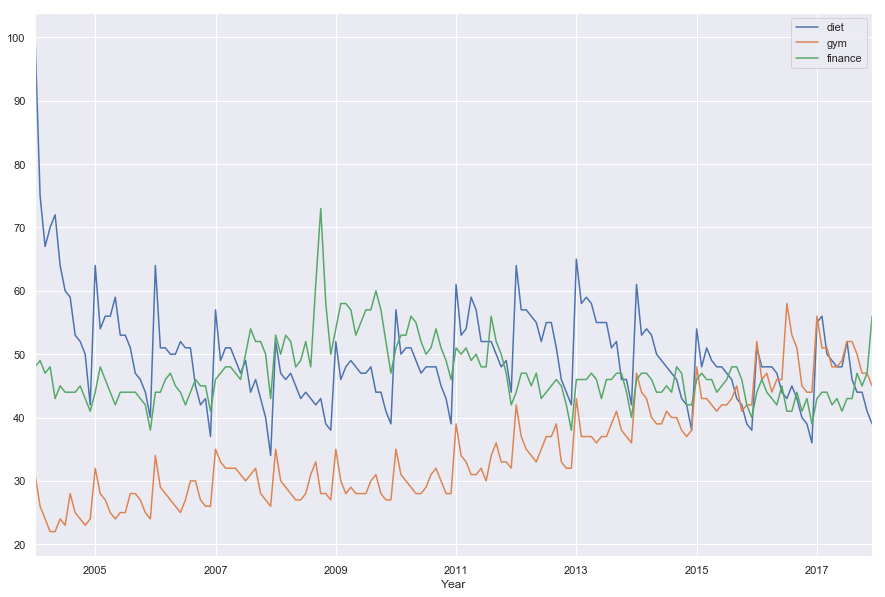

In [31]:
data.plot(figsize=(15,10))
plt.xlabel('Year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B26F4B518>,
      dtype=object)

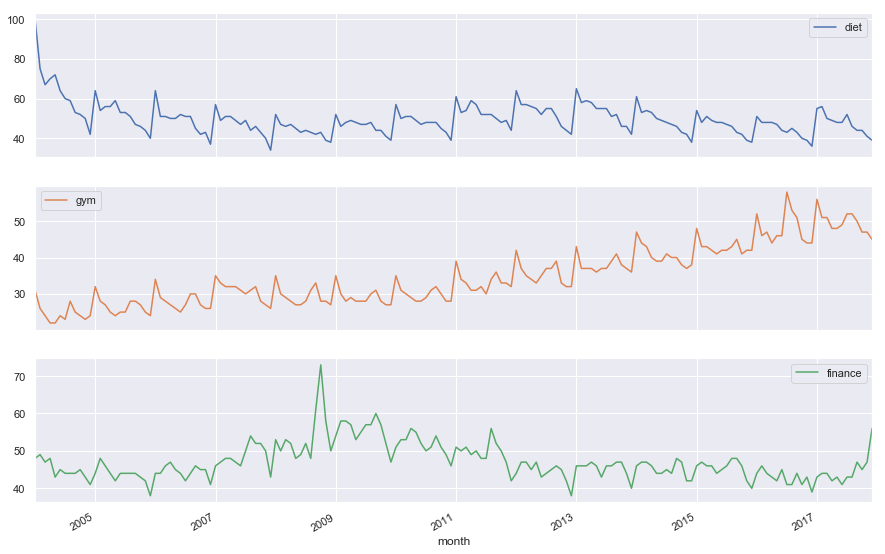

In [30]:
data.plot(subplots=True, figsize=(15,10))

# So what can we do to look deeper for trends and relationships?

# Trend.
- So,remove seasonality 

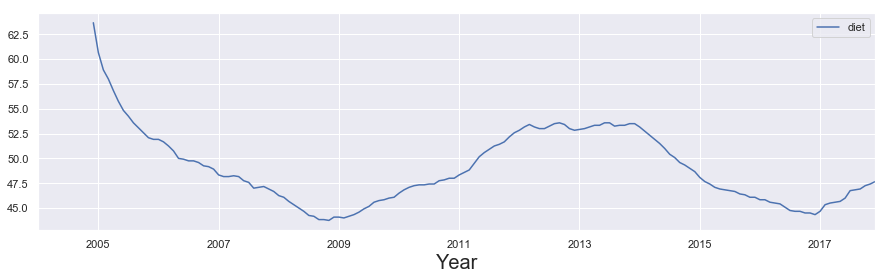

In [46]:

data[["diet"]].rolling(12).mean().plot(figsize=(15,4))
plt.xlabel('Year', fontsize=20);


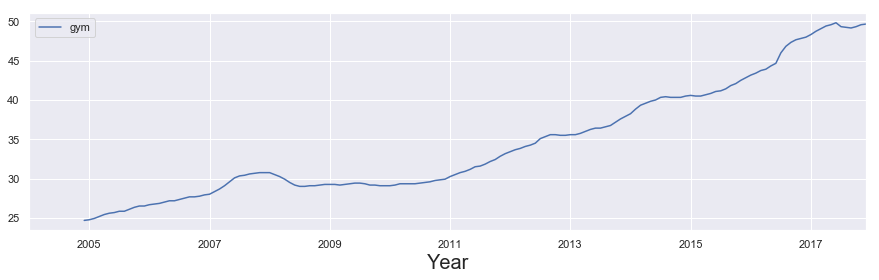

In [48]:
gym = data[['gym']]
gym.rolling(12).mean().plot(figsize=(15,4))
plt.xlabel('Year', fontsize=20);

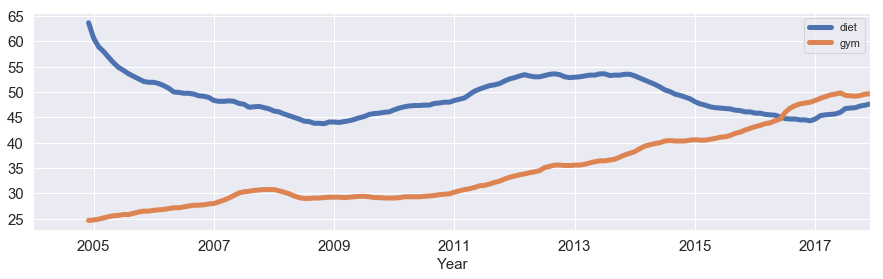

In [52]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(15,4), linewidth=5, fontsize=15)
plt.xlabel('Year', fontsize=15);

# Seasonality 

- Another way to remove the trend is called "differencing",
- where you look at the difference between successive data points 
- (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

Differencing is super helpful in turning your time series into a stationary time series. You won't get too much into these here but a stationary time series is one whose statistical properties (such as mean and variance) don't change over time. These time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

'In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.'

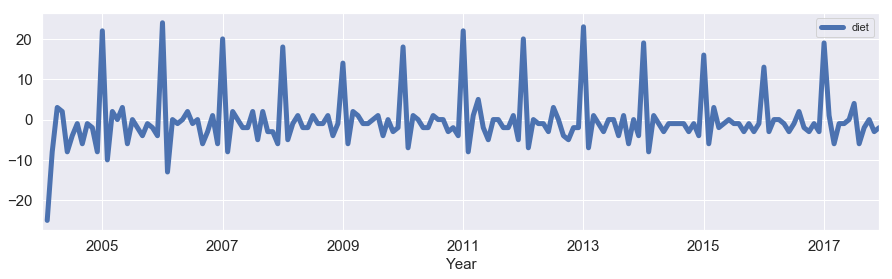

In [53]:
diet.diff().plot(figsize=(15,4), linewidth=5, fontsize=15)
plt.xlabel('Year', fontsize=15);


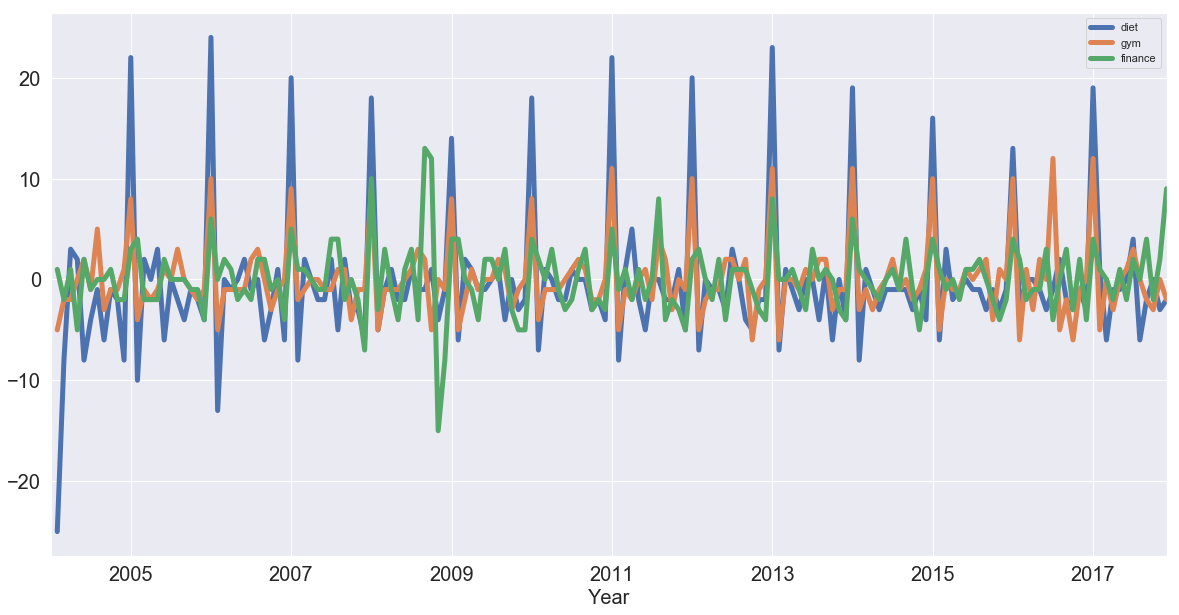

In [55]:
data.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [56]:
data.diff().corr()
# This correlation doesnt have trend in this. Just looking at the seasonality 
# removing the trend may reveal correlation in seasonality.

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


# Periodicity and Autocorrelation
A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that.

Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months. That means that, if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation.

(0, 120)

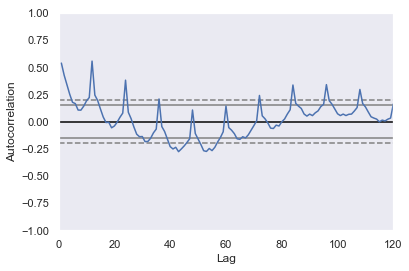

In [63]:
ax = pd.plotting.autocorrelation_plot(diet);
ax.set_xlim([0, 120])

# autocorrelation function at 12 months: the time series is correlated with itself shifted by twelve months.

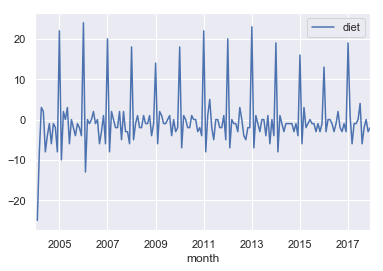

In [72]:
test = data[['diet']].diff()
test.plot()

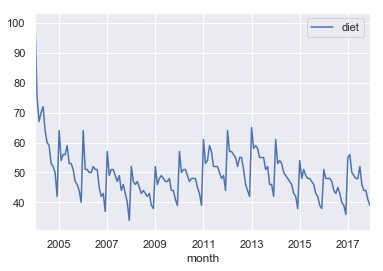

In [70]:
data[['diet']].plot()

(0, 120)

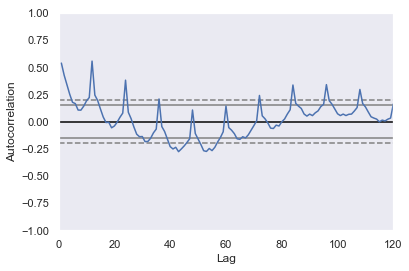

In [66]:
ax = pd.plotting.autocorrelation_plot(data[['diet']]);
ax.set_xlim([0, 120])

In [95]:
import statsmodels.api as sm
sm.stats.diagnostic.acorr_ljungbox(data[['diet']], lags=12, boxpierce=True)

(array([ 49.47826728,  80.82143566, 100.70624311, 111.64173222,
        117.14532062, 121.95556103, 123.95498317, 125.9192589 ,
        129.51454284, 136.02879414, 144.95012178, 201.57782718]),
 array([2.00581471e-12, 2.81739822e-18, 1.09555816e-21, 3.24947890e-23,
        1.26239936e-23, 6.32763608e-24, 1.14844693e-23, 1.98092760e-23,
        1.49237950e-23, 2.74048661e-24, 1.59919617e-25, 1.54056318e-36]),
 array([ 48.60512138,  79.21080346,  98.51076362, 109.0602943 ,
        114.33726435, 118.9211405 , 120.81471089, 122.66344098,
        126.02608891, 132.0805107 , 140.31961916, 192.28386647]),
 array([3.13050653e-12, 6.30365703e-18, 3.24851392e-21, 1.15448108e-22,
        4.95933502e-23, 2.74559023e-23, 5.18335192e-23, 9.33871484e-23,
        7.77228436e-23, 1.75713051e-23, 1.40240235e-24, 1.27177724e-34]))